### Accessing a Database

In [2]:
pip install PyMySQL #pymsql is a module used to access databases in python

     |████████████████████████████████| 51kB 113kB/s eta 0:00:011
Note: you may need to restart the kernel to use updated packages.


**Establishing connection**

In [6]:
import pymysql

In [15]:
DB = pymysql.connect(host="localhost", user="root", passwd="enezeryoel10", db="ResearchInstitute")

InternalError: (1698, "Access denied for user 'root'@'localhost'")

In [ ]:
import pymysql
db = pymysql.connect(host=’localhost’,
user=’root’, passwd=’secret’, db=’PythonU’)
cursor = db.cursor()
cursor.execute(’SELECT * FROM Students’)
for row in cursor:
    print(row)

### SQlite

In [21]:
conda install sqlite

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
import sqlite3

In [3]:
!sqlite3 chinook.db ".tables"

albums          employees       invoices        playlists     
artists         genres          media_types     tracks        
customers       invoice_items   playlist_track


In [4]:
conn = sqlite3.connect('chinook.db') ##assigning the database to a variable

**Executing queries from python**

In [7]:
c = conn.cursor() # Cursor help in walking through records

In [9]:
c.execute("select * from albums")

In [10]:
c.fetchone()

(1, 'For Those About To Rock We Salute You', 1)

In [ ]:
for row in c.execute('select * from albums'):
    print(row)

In [ ]:
for row in c.execute('''
SELECT trackid, name, composer, unitprice
FROM tracks limit 5;
'''):
        print(row)

### Pandas.

In [17]:
import pandas

In [19]:
df = pandas.read_sql("""
SELECT
    trackid,
    name,
    composer,
    unitprice
FROM tracks 
""", conn)
df

,TrackId,Name,Composer,UnitPrice
0,1,For Those About To Rock (We Salute You),"Angus Young, Malcolm Young, Brian Johnson",0.99
1,2,Balls to the Wall,None,0.99
2,3,Fast As a Shark,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",0.99
3,4,Restless and Wild,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",0.99
4,5,Princess of the Dawn,Deaffy & R.A. Smith-Diesel,0.99
...,...,...,...,...
3498,3499,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,None,0.99
3499,3500,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",Franz Schubert,0.99
3500,3501,"L'orfeo, Act 3, Sinfonia (Orchestra)",Claudio Monteverdi,0.99
3501,3502,"Quintet for Horn, Violin, 2 Violas, and Cello ...",Wolfgang Amadeus Mozart,0.99


In [20]:
pandas.read_sql("""
SELECT
    trackid,
    name,
    composer,
    unitprice
FROM tracks WHERE unitprice <> 0.99
""", conn)

,TrackId,Name,Composer,UnitPrice
0,2819,Battlestar Galactica: The Story So Far,None,1.99
1,2820,Occupation / Precipice,None,1.99
2,2821,"Exodus, Pt. 1",None,1.99
3,2822,"Exodus, Pt. 2",None,1.99
4,2823,Collaborators,None,1.99
...,...,...,...,...
208,3362,"There's No Place Like Home, Pt. 1",None,1.99
209,3363,"There's No Place Like Home, Pt. 2",None,1.99
210,3364,"There's No Place Like Home, Pt. 3",None,1.99
211,3428,Branch Closing,None,1.99


In [21]:
df.dtypes

TrackId        int64
Name          object
Composer      object
UnitPrice    float64
dtype: object

In [22]:
df.drop(['Composer'], axis=1)

,TrackId,Name,UnitPrice
0,1,For Those About To Rock (We Salute You),0.99
1,2,Balls to the Wall,0.99
2,3,Fast As a Shark,0.99
3,4,Restless and Wild,0.99
4,5,Princess of the Dawn,0.99
...,...,...,...
3498,3499,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,0.99
3499,3500,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",0.99
3500,3501,"L'orfeo, Act 3, Sinfonia (Orchestra)",0.99
3501,3502,"Quintet for Horn, Violin, 2 Violas, and Cello ...",0.99


In [26]:
#df.to_excel("pandasExcel.xlsx", "Sheet1")
df.to_json("pandas.json")

In [27]:
!ls -lhr

total 1.2M
-rw-r--r-- 1 enezer enezer  35K Jan 16 11:43  trial.ipynb
-rw-r--r-- 1 enezer enezer   18 Jan 15 14:56  README.md
-rw-r--r-- 1 enezer enezer 266K Jan 16 11:44  pandas.json
-rw-rw-r-- 1 enezer enezer  18K Jan 15 15:07 'Eneza Yoel.sql'
-rw-rw-r-- 1 enezer enezer 864K Jan 15 16:34  chinook.db


In [ ]:
!cat pandas.json

In [30]:
df_filtered = df.query('UnitPrice!=1.99')
df_filtered

,TrackId,Name,Composer,UnitPrice
0,1,For Those About To Rock (We Salute You),"Angus Young, Malcolm Young, Brian Johnson",0.99
1,2,Balls to the Wall,None,0.99
2,3,Fast As a Shark,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",0.99
3,4,Restless and Wild,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",0.99
4,5,Princess of the Dawn,Deaffy & R.A. Smith-Diesel,0.99
...,...,...,...,...
3498,3499,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,None,0.99
3499,3500,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",Franz Schubert,0.99
3500,3501,"L'orfeo, Act 3, Sinfonia (Orchestra)",Claudio Monteverdi,0.99
3501,3502,"Quintet for Horn, Violin, 2 Violas, and Cello ...",Wolfgang Amadeus Mozart,0.99


**Reading VCF file**

In [32]:
vcf = pandas.read_csv('PIK3CA.vcf', delimiter='\t', comment='#')
vcf

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,009T,...,MBC549,MBC550,MBC551,MBC553,MBC556,MBC557,MBC558,MBC561,MBC563,MBC564
0,3,178916581,.,T,C,60.58,MappingQuality,AC=2;AF=5.495e-03;AN=364;ANN=C|5_prime_UTR_var...,GT:AD:DP:GQ:PGT:PID:PL,"0/0:11,0:11:33:.:.:0,33,495",...,"0/0:6,0:6:0:.:.:0,0,223","0/0:8,0:8:15:.:.:0,15,225","0/0:12,0:12:24:.:.:0,24,360","0/0:33,0:33:81:.:.:0,81,1215","0/0:22,0:22:25:.:.:0,25,1064","0/0:2,0:2:6:.:.:0,6,90","0/0:16,0:16:45:.:.:0,45,675","0/0:9,0:9:0:.:.:0,0,301","0/0:26,0:26:66:.:.:0,66,990","0/0:23,0:23:0:.:.:0,0,970"
1,3,178916644,.,T,G,187.06,LowQualityDepth;MappingQuality;SnpCluster;Stra...,AC=6;AF=0.017;AN=362;ANN=G|missense_variant|MO...,GT:AD:DP:GQ:PGT:PID:PL,"0/0:15,1:17:6:.:.:0,6,567",...,"0/0:13,0:13:0:.:.:0,0,339","0/0:10,0:10:0:.:.:0,0,263","0/0:15,0:15:0:.:.:0,0,638","0/0:30,1:31:51:.:.:0,51,1162","0/0:36,0:36:0:.:.:0,0,1615","0/0:7,0:7:18:.:.:0,18,270","0/0:38,0:38:0:.:.:0,0,1542","0/0:12,0:12:0:.:.:0,0,409","0/0:35,0:35:0:.:.:0,0,1473","0/0:36,0:36:0:.:.:0,0,1589"
2,3,178916645,COSM582519,G,T,427.05,MappingQuality;SnpCluster;StrandBias,AC=11;AF=0.030;AN=366;ANN=T|missense_variant|M...,GT:AD:DP:GQ:PGT:PID:PL,"0/0:24,0:24:0:.:.:0,0,1171",...,"0/0:13,0:13:0:.:.:0,0,339","0/0:10,0:10:0:.:.:0,0,263","0/0:14,0:14:23:.:.:0,23,786","0/0:48,0:48:0:.:.:0,0,1993","0/0:36,0:36:0:.:.:0,0,1615","0/0:7,0:7:0:.:.:0,0,275","0/0:24,1:25:40:.:.:0,40,883","0/0:12,0:12:0:.:.:0,0,409","0/1:20,2:22:5:0|1:178916643_G_T:5,0,893","0/1:22,2:24:2:0|1:178916643_G_T:2,0,1658"
3,3,178916651,COSM1420723,T,C,157.23,LowQualityDepth;MappingQuality;SnpCluster,AC=6;AF=0.017;AN=362;ANN=C|missense_variant|MO...,GT:AD:DP:GQ:PGT:PID:PL,"0/0:30,0:30:0:.:.:0,0,1085",...,"0/0:11,0:11:0:.:.:0,0,322","0/0:10,0:10:0:.:.:0,0,266","0/0:15,0:15:0:.:.:0,0,540","0/0:47,0:47:0:.:.:0,0,1598","0/0:32,0:32:0:.:.:0,0,1241","0/0:8,0:8:0:.:.:0,0,19","0/0:36,0:36:0:.:.:0,0,1336","0/0:8,0:8:0:.:.:0,0,287","0/0:24,0:24:0:.:.:0,0,977","0/0:33,0:33:0:.:.:0,0,1275"
4,3,178916931,COSM166340,C,A,391.68,MappingQuality,AC=1;AF=2.703e-03;AN=370;ANN=A|synonymous_vari...,GT:AD:DP:GQ:PL,"0/0:17,0:17:39:0,39,585",...,"0/0:17,0:17:33:0,33,495","0/0:16,0:16:33:0,33,495","0/0:8,0:8:21:0,21,315","0/0:44,0:44:99:0,99,1485","0/0:43,0:43:99:0,99,1485","0/0:3,0:3:6:0,6,90","0/0:34,0:34:81:0,81,1215","0/0:12,0:12:27:0,27,405","0/0:26,0:26:60:0,60,900","0/0:44,0:44:99:0,102,1530"
5,3,178917005,rs3729674,A,G,665.15,MappingQuality,AC=8;AF=0.667;AN=12;ANN=G|sequence_feature|LOW...,GT:AD:DP:GQ:PL,"./.:0,0:0",...,"./.:0,0:0","./.:0,0:0","./.:0,0:0","0/1:4,3:7:99:102,0,142","./.:0,0:0","./.:0,0:0","./.:0,0:0","./.:0,0:0","./.:0,0:0","./.:0,0:0"
6,3,178917478,COSM751,G,A,96.06,MappingQuality,AC=1;AF=2.762e-03;AN=362;ANN=A|missense_varian...,GT:AD:DP:GQ:PL,"0/0:14,0:14:36:0,36,540",...,"0/0:4,0:4:12:0,12,180","0/0:5,0:5:15:0,15,225","0/0:2,0:2:6:0,6,90","0/0:32,0:32:90:0,90,1350","0/0:27,0:27:81:0,81,1215","0/0:2,0:2:6:0,6,90","0/0:25,0:25:72:0,72,1080","0/0:8,0:8:24:0,24,360","0/0:21,0:21:48:0,48,720","0/0:33,0:33:78:0,78,1170"
7,3,178919190,.,C,A,909.13,MappingQuality;StrandBias,AC=14;AF=0.038;AN=372;ANN=A|synonymous_variant...,GT:AD:DP:GQ:PL,"0/0:16,0:16:39:0,39,585",...,"0/0:11,0:11:3:0,3,403","0/0:11,0:11:0:0,0,105","0/0:1,0:1:3:0,3,45","0/1:32,6:38:99:138,0,880","0/0:49,0:49:0:0,0,1849","0/0:5,0:5:9:0,9,135","0/0:40,0:40:0:0,0,1410","0/0:6,0:6:0:0,0,87","0/0:11,0:11:0:0,0,341","0/0:33,0:33:0:0,0,952"
8,3,178921407,.,C,T,47.85,MappingQuality,AC=2;AF=5.348e-03;AN=374;ANN=T|synonymous_vari...,GT:AD:DP:GQ:PL,"0/0:32,0:32:81:0,81,1215",...,"0/0:21,0:21:57:0,57,855","0/0:20,0:20:54:0,54,810","0/0:2,0:2:6:0,6,90","0/0:33,0:33:99:0,99,1485","0/0:33,0:33:99:0,99,1485","0/0:6,0:6:12:0,12,180","0/0:39,0:39:99:0,99,1485","0/0:17,0:17:45:0,45,675","0/0:39,0:39:99:0,99,1485","0/0:43,0:43:99:0,102,1530"
9,3,178921525,.,T,A,60.74,MappingQuality,AC=2;AF=5.495e-03;AN=364;ANN=A|missense_varian...,GT:AD:DP:GQ:PL,"0/0:8,0:8:0:0,0,363",...,"0/0:5,0:5:0:0,0,158","0/0:5,0:5:0:0,0,213","0

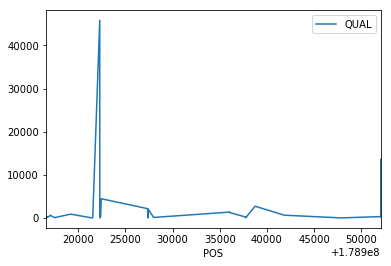

In [38]:
vcf.plot(x='POS', y='QUAL', kind= 'line') #scatter , line

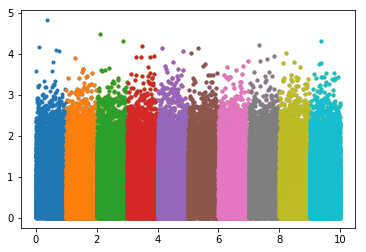

In [39]:
import matplotlib.pyplot as plt
from numpy.random import randn, random_sample

g = random_sample(int(1e5))*10 # uniform random values between 0 and 10
p = abs(randn(int(1e5))) # abs of normally distributed data

"""
plot g vs p in groups with different colors
colors are cycled automatically by matplotlib
use another colormap or define own colors for a different cycle
"""
for i in range(1,11): 
    plt.plot(g[abs(g-i)<1], p[abs(g-i)<1], ls='', marker='.')

plt.show()
